In [5]:
from pyAudioAnalysis.audioSegmentation import speaker_diarization
from pyAudioAnalysis.audioSegmentation import labels_to_segments
from pyAudioAnalysis.audioBasicIO import read_audio_file, stereo_to_mono, convert_dir_mp3_to_wav

In [1]:
import numpy as np
import scipy.io.wavfile as wavfile
import IPython
import glob, sys, os
from os import listdir
from os.path import isfile, join

In [2]:
mypath = "F:/Boolean-Lab/speech-expresssion-analysis/demo-implementation/RC call records/"

onlyfiles = [join(mypath, f) for f in listdir(mypath) if isfile(join(mypath, f))][:-3]

n_speakers = 2

In [4]:
len(onlyfiles)

16

In [ ]:
for filename in onlyfiles:
    fs, x = read_audio_file(filename)

    cls = speaker_diarization(filename, n_speakers ,lda_dim=0,mid_window=2.0,mid_step=0.2, plot_res =True)


    # save clusters to concatenated wav files
    segs, c = labels_to_segments(cls,0.2)  # convert flags to segment limits
    x_clusters = [np.zeros((fs, )) for i in range(n_speakers)]

    for sp in range(n_speakers): 
        energy = 0
        count_cl = 0
        for i in range(len(c)):     # for each segment in each cluster (>2 secs long)
            if c[i] == sp and segs[i, 1]-segs[i, 0] > 2:
                count_cl += 1
                # get the signal and append it to the cluster's signal (followed by some silence)
                cur_x = x[int(segs[i, 0] * fs): int(segs[i, 1] * fs)]
                energy+= (np.mean(np.absolute(cur_x)))**2
                x_clusters[sp] = np.append(x_clusters[sp], cur_x)
                x_clusters[sp] = np.append(x_clusters[sp], np.zeros((fs,)))
        # write cluster's signal into a WAV file
        print(f'speaker {sp}: {count_cl} segments {len(x_clusters[sp])/float(fs)} sec total dur')  
        print(energy/count_cl)
        wavfile.write(f'diarization_cluster_{sp}.wav', fs, np.int16(x_clusters[sp]))
        IPython.display.display(IPython.display.Audio(f'diarization_cluster_{sp}.wav'))

In [6]:
mypath = "F:/Boolean-Lab/speech-expresssion-analysis/demo-implementation/RC call records/"

onlyfiles = [join(mypath, f) for f in listdir(mypath) if isfile(join(mypath, f))][:-3]

In [8]:
fs, x = read_audio_file(onlyfiles[0])

In [12]:
import matplotlib.pyplot as plt

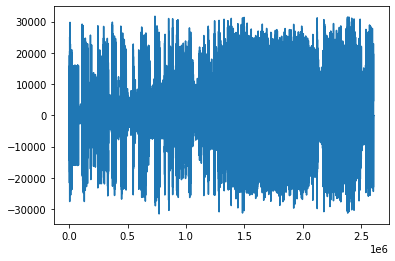

In [15]:
plt.plot(x) # plotting by columns
plt.show()

In [ ]:
#demo of IBM watson
#https://speech-to-text-demo.ng.bluemix.net/